https://theailearner.com/tag/cv2-minarearect/

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import transform
from skimage.color import rgb2gray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  import sys


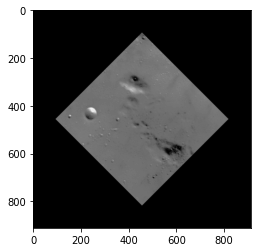

In [93]:
img = data.moon()

border_pix = 200
rotate_angle = 45
img = cv2.copyMakeBorder(img, border_pix, border_pix, border_pix, border_pix, cv2.BORDER_CONSTANT)
img = transform.rotate(img, rotate_angle)
img_gray = rgb2gray(img)*255
img_gray = img_gray.astype('uint8')

plt.imshow(img_gray, cmap = 'gray');

In [94]:
ret, thresh = cv2.threshold(img_gray, 10, 255, 0) # threshold image for better results, could use Otsu
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(contours[0])
print(f"Box rotation angle: {rect[-1]}")
box = cv2.boxPoints(rect)
box = np.int0(box)

Box rotation angle: 45.0


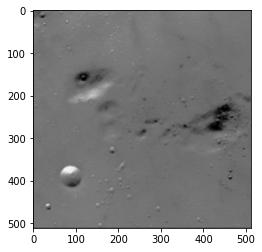

In [95]:
# get width and height of the detected rectangle
width = int(rect[1][0])
height = int(rect[1][1])
src_pts = box.astype("float32")

# coordinate of the points in box points after the rectangle has been straightened
dst_pts = np.array([[0, height-1],
                    [0, 0],
                    [width-1, 0],
                    [width-1, height-1]], dtype="float32")

# the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# directly warp the rotated rectangle to get the straightened rectangle
img_warped = cv2.warpPerspective(img_gray, M, (width, height))

plt.imshow(img_warped, cmap='gray');